# Aplicação do **$PID$** (**P**roportional **I**ntegral **D**erivative) na **Robótica Móvel**

**Material Complementar**: [Playlist](https://www.youtube.com/watch?v=qWWKAMMnPs8&list=PL95MRzIafgcdE1YEE87iReF3vCdL5DXtX)

## **$PID$** ([@reference](https://en.wikipedia.org/wiki/Proportional%E2%80%93integral%E2%80%93derivative_controller))

###*Overall Control Funcion*###

$$u(t) = K_P\,e(t) + K_I∫_{0}^{t}e({τ})\,dτ + K_D\dfrac{de(t)}{dt}$$  

Onde $K_P$ determina o **ganho proporcional**, ou seja quanto maior o erro mais o $PID$ irá agir sobre a trajetória (Mais rápido ele chegará no ***SETPOINT***). $K_I$ determina o **ganho Integral** (Acelera o processo de redução do erro no processo de convergencia). $K_D$ determina o ganho diferencial (Reduz as oscilaçãos no processo de convergencia da trajetória).


## **Modelo Cinemático**

$$\begin{pmatrix}\dot{x}\\ \dot{y}\\ \dot{\theta}\end{pmatrix} = \begin{pmatrix}\cos{\theta} & 0\\ \sin{\theta} & 0\\ 0 & 1\end{pmatrix}\begin{pmatrix}v\\ω\end{pmatrix} → \begin{pmatrix}\dot{x}\\\dot{y}\\\dot{\theta}\end{pmatrix} = \begin{pmatrix}v\cos{\theta}\\v\sin{\theta}\\ω\end{pmatrix}$$

## **Cinemática Inversa**

$$\omega_R = \dfrac{2v + \omega L}{2r}$$    
$$\omega_L = \dfrac{2v - \omega L}{2r}$$  
  
$L$ é a **Largura** do Robô, $\omega$ é sua velocidade angular, $ω_L$ é a velocidade angular da roda esquerda e $\omega_R$ é a velocidade angular da roda direita.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# **Definição das Características Físicas do Robô**

Aqui teremos que fornecer $L$ (A largura do Robô) e $R$ (Raio das rodas dos Robô) e tempo de simulação.
  
O robô também apresenta limitações quanto sua velocidade angular $\omega$, isto é ele não é capaz de girar $90^{\circ}$ em um $dt$ (Nesta simulação, $dt = 10ms$). Então devemos estipular um limite sobre o quanto o robô consegue rotacionar em um intervalo $dt$. Para essa simulação iremos supor que o robô seja capaz de girar $10^{\circ}$ a cada $1$s, ou seja.

$$\omega = \dfrac{\pi}{18} \dfrac{rad}{s} \rightarrow \dfrac{\pi}{1800}\dfrac{rad}{dt=10ms}$$

In [11]:
# Definir características físicas do Robô
WHEEL_RADIUS = 0.1  # 10 cm
ROBOT_WIDTH  = 0.6  # 60 cm

# Suponha que robô precise de 1 [s] para girar 10º para qualquer posição
def robotRotate(dtheta: float) -> float:
  limit: float = (np.pi/ 18) * dt
  if dtheta > limit:
    return limit
  elif dtheta < -limit:
    return -limit
  else:
    return dtheta

# Info. da simulação
dt = 0.01 # incremento de tempo
tf = 50.0 # tempo final

# **Simulação 1**

Aqui iremos analisar o comportamento do robô para diferentes velocidades angulares de cada do roda, ou seja qual a trajetória do robô se, por exemplo, as velocidades angulares das rodas direita e esquerda forem iguais e diferentes.

## Dadas $\omega_L$ e $\omega_R$, então.

$$v_L = \omega_LR, v_R = \omega_RR$$  
$$\omega = \dfrac{v_R - v_L}{L}$$  
$$v = \dfrac{v_R + v_L}{2}$$

## **Visualização da Trajetória**

$$\begin{cases}x(t) = v\cos(\theta)Δ t \\\\y(t) = v\sin(\theta)\Delta t\end{cases}$$

## Observações

Para $\omega_L = \omega_R$ a trajetória descrita pelo robô será uma linha reta, já que $v_R$ e $v_L$ serão iguais $\rightarrow \omega = 0$ (O robô não terá velocidade angular). Se $\omega_L \lt \omega_R$, então o robô irá girar para a esquerda (sempre em direção à roda com menor velocidade angular) descrevendo uma trajetória circular para esquerda da origem. O mesmo fenômeno ocorre quando $\omega_L \gt \omega_R$.

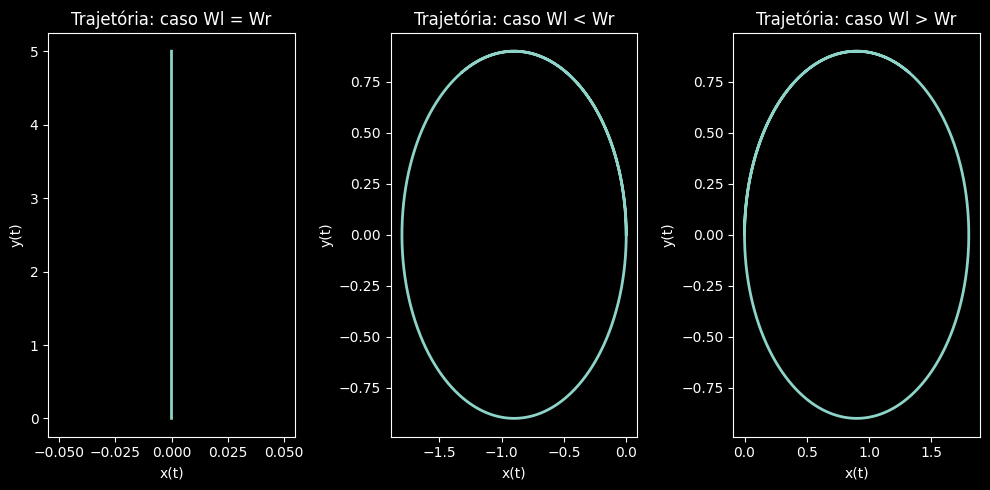

In [12]:
# Wl == Wr
wl1 = 1
wr1 = 1

# Wl < Wr
wl2 = 1
wr2 = 2

# Wl > Wr
wl3 = 2
wr3 = 1

# Vel. linear das rodas
vl1 = wl1 * WHEEL_RADIUS
vr1 = wr1 * WHEEL_RADIUS

vl2 = wl2 * WHEEL_RADIUS
vr2 = wr2 * WHEEL_RADIUS

vl3 = wl3 * WHEEL_RADIUS
vr3 = wr3 * WHEEL_RADIUS

# Vel. Ang. e Lin. do robô no ICR
w1 = (vr1 - vl1)/ ROBOT_WIDTH
v1 = (vr1 + vl1)/ 2

w2 = (vr2 - vl2)/ ROBOT_WIDTH
v2 = (vr2 + vl2)/ 2

w3 = (vr3 - vl3)/ ROBOT_WIDTH
v3 = (vr3 + vl3)/ 2

# Posição inicial e inclinação do robô
x1, y1, theta1 = 0, 0, np.pi/ 2.0
x2, y2, theta2 = 0, 0, np.pi/ 2.0
x3, y3, theta3 = 0, 0, np.pi/ 2.0

# Simulação
X1, Y1 = [], []
X2, Y2 = [], []
X3, Y3 = [], []

t = 0
while t < tf:
  # Update
  theta1 += w1 * dt
  x1 += (v1 * np.cos(theta1)) * dt
  y1 += (v1 * np.sin(theta1)) * dt

  theta2 += w2 * dt
  x2 += (v2 * np.cos(theta2)) * dt
  y2 += (v2 * np.sin(theta2)) * dt

  theta3 += w3 * dt
  x3 += (v3 * np.cos(theta3)) * dt
  y3 += (v3 * np.sin(theta3)) * dt

  X1.append(x1)
  Y1.append(y1)

  X2.append(x2)
  Y2.append(y2)

  X3.append(x3)
  Y3.append(y3)

  t += dt

plt.style.use('dark_background')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))

ax1.plot(np.round(X1, decimals=5), np.round(Y1, decimals=5), linewidth=2)
ax1.set_title(f'Trajetória: caso Wl = Wr')
ax1.set_xlabel('x(t)')
ax1.set_ylabel('y(t)')

ax2.plot(X2, Y2, linewidth=2)
ax2.set_title(f'Trajetória: caso Wl < Wr')
ax2.set_xlabel('x(t)')
ax2.set_ylabel('y(t)')

ax3.plot(X3, Y3, linewidth=2)
ax3.set_title(f'Trajetória: caso Wl > Wr')
ax3.set_xlabel('x(t)')
ax3.set_ylabel('y(t)')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


# **Aplicação do PID na trajetória do Robô**

Dado um ***SETPOINT*** e uma posição ($x_0, y_0$) e inclinação iniciais do robô  ($\theta_0$), o mesmo deverá traçar uma trajetória **convergente** em direção ao ***SETPOINT***.
  
Uma opção seria desenvolver dois **$PID$**s, uma para o controle da posição e outro para o controle do angulo, mas para isso teríamos que configurar $K_P, K_I$ e $K_D$ para ambos os controladores. Ao invés disso, decidi utilizar um **$PID$** para o controle da posição ($x, y$) e da inclinação ($\theta$), porém para isso esta abordagem funcione devemos implementar algumas funções auxiliares para o controle da inclinação. A função *fixAngle* garante que o robô seguirá apenas em direção à direita (ele nunca volta) o que é fator primordial para a convergência da trajetória em torno do ***SETPOINT***. Este mecanismo limita o angulo $\theta$ dentro do intervalo $[\dfrac{\pi}{2}, -\dfrac{\pi}{2}]$ fixando seu valor nas extremidades caso $\theta$ vier a ultrapassar esses limites.  

Os parâmetros do $PD$ (Não fiz o uso da parte Integral) foram $K_P = 1.9$, $K_D = 2.7$. Não necessariamente é a melhor combinação, mas apresentou resultados mais do que satisfatórios em questão de convergencia.

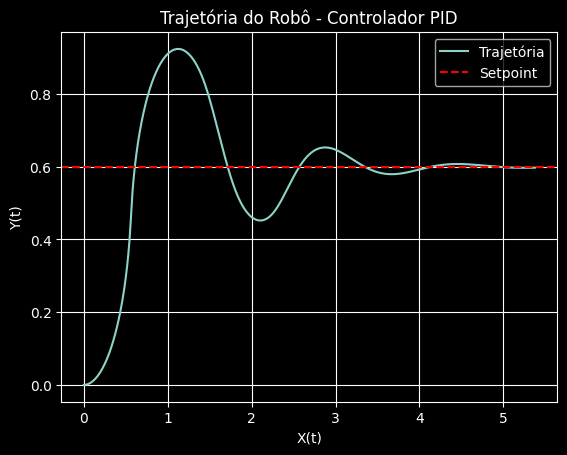

In [13]:
def fixAngle(angle: float) -> float:
    if angle > np.pi/ 2:
      return np.pi/2
    elif angle < -np.pi/ 2:
      return -np.pi/2
    else:
      return angle

def Controller(y, setpoint, e0, sum):
  # E = np.sqrt(np.power(xf - y, 2) + np.power(yf - y, 2))
  e = setpoint - y
  sum += e * dt
  dp = (e - e0)/ dt

  P = e   *   Kp
  I = sum *   Ki
  D = dp  *   Kd

  control = P + I + D

  return control, e, sum

# Parâmetros do PID
Kp = 1.9
Ki = 0
Kd = 2.7

# Setpoint
setpoint = 0.6

# Posição Inicial e Angulo
x, y, theta = 0, 0, 0

# Velocidades iniciais
wl, wr = 1, 1

# Lista de valores para plotar
X, Y = [], []

# Simulação
t = 0.0
sum = 0.0
e0 = 0.0

# 1 minute de simulação
while t < 60:
  # Controlador PID
  control, e0, sum = Controller(y, setpoint, e0, sum)
  # print(f'controller.control = {control}')

  # Ajuste das vel. Angulares das rodas
  wl -= control * dt
  wr += control * dt

  # Vel. linear das rodas
  vl = wl * WHEEL_RADIUS
  vr = wr * WHEEL_RADIUS

  # Vel. Ang. e Lin. do robô no ICR
  w = (vr - vl)/ ROBOT_WIDTH
  v = (vr + vl)/ 2

  theta = fixAngle(theta + robotRotate(control * w * dt))

  #if t <= 1:
    #print(f'theta={theta}, w = {w}, control={control}')

  # Update
  x += (v * np.cos(theta)) * dt
  y += (v * np.sin(theta)) * dt

  # Mapeamento
  X.append(x)
  Y.append(y)

  t += dt

# Plot trajectory
plt.plot(X, Y, label='Trajetória')
plt.axhline(setpoint, color='r', linestyle='--', label='Setpoint')
plt.xlabel('X(t)')
plt.ylabel('Y(t)')
plt.title('Trajetória do Robô - Controlador PID')
plt.legend()
plt.style.use('dark_background')
plt.grid(True)
plt.show()

# **Conclusão**

Como podemos observar no gráfico acima, a trajetória do robô apresentou um comportamento convergente (controlado) dentro de uma simualação de $1$ minuto. Os ganhos $K_P, K_I$ e $K_D$ são extremamentes sensíveis e qualquer alterações nestes valores podem levar a uma perda de controle na trajetória ($\lim_{t\to∞}\,e(t) = ∞$ ou o robô pode cair em um regime permante onde $e(t)$ é constante. Lembrando que nosso objetivo é $\lim_{t\to∞}\,e(t) = 0$)